# Manual Analyses for Data Engineering Project
This notebook is purely for the development of the Data Engineering project.
It is not part of the final pipeline, nor should it contain any code that is vital to it.

## Imports

In [1]:
import data_quality_assessor as dqa
import data_wrangler as dw
import datasets.untappd

import warnings

import pandas as pd
import seaborn as sns

## Setup

In [9]:
warnings.simplefilter(action="ignore", category=pd.errors.PerformanceWarning)

pd.options.display.float_format = '{:.2f}'.format
# pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

sns.set_theme(rc={'figure.figsize':(12, 15)})

## Data Quality
### General Overview

In [3]:
dataset = datasets.untappd.UntappdDataset()

data_wrangler = dw.DataWrangler(dataset)
data_wrangler.handle_duplicates()
data_wrangler.parse_category_and_type_features()
data_wrangler.generate_flavor_features()

data_quality_assessor = dqa.DataQualityAssessor(dataset=data_wrangler.dataset.df)

data_quality_assessor.dataset

,beer_name,brewery_name,beer_category,beer_type,abv,ibu,description,rating,acetaldehyde,acidic,alcoholic,almond,apple,aromatic,autumnal,banana,barley,barrel aged,belgiany,bitter,blueberry,body,boozy,bourbon,brandy,bread,brown sugar,bubblegum,buttery,cacao,cake,candy,caramel,caramelly,carbonated,cardamom,cherry,chili,chocolate,cinnamon,citrus,citrusy,clean,cloudberry,cocoa,coconut,coffee,coffeeish,cognac,cookie,creamy,crisp,dank,dark,deep,dry,drying,earthy,elegant,fatty,flat,floral,fruity,full bodied,fullness,funky,gentle,grapefruity,grassy,guava,hazelnut,hazy,heavy,herbaceous,herbal,honey,hoppy,intense,juicy,juniper,kiwi,lactose,lemony,licorice,light bodied,malty,mandarin,mango,maple,milk,molasses,musty,nutty,oak,oatmeal,orange,peachy,peanut butter,pear,pecan,pineapple,piney,pumpkin,raspberry,red fruit,red wine,refreshing,rich,roasty,rye,salty,sherry,smoked,smoky,smooth,soft,sour,sparkling,spiced,spicy,spring,spruce,sticky,strawberry,strong,subtle,sweet,sweet potato,sweetness,syrupy,tart,thick,thin,toffee,tonka,tropical,ube,vanilla,velvety,warm,warming,watery,whisky,white wine,woody,yeasty
0,#DIPA,To Øl,IPA,Imperial / Double New England / Hazy IPA,8.70,50,<NA>,4.00,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
1,'n Diquen Blueberry Chocolate Stout 2022,Fightstreet Brewery,Stout,Russian Imperial Stout,9.00,50,Bierrr 👍 stout,3.75,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
2,'t Gouden IJ,Brouwerij 't IJ,Blonde / Golden Ale,Other Blonde / Golden Ale,6.80,0,<NA>,3.50,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
3,320 Magnetite Stout,Kiruna Bryggeri,Stout,Imperial / Double Stout,8.80,100,<NA>,4.00,False,False,False,False,False,False,Fal

### Boxplots of Continuous Features

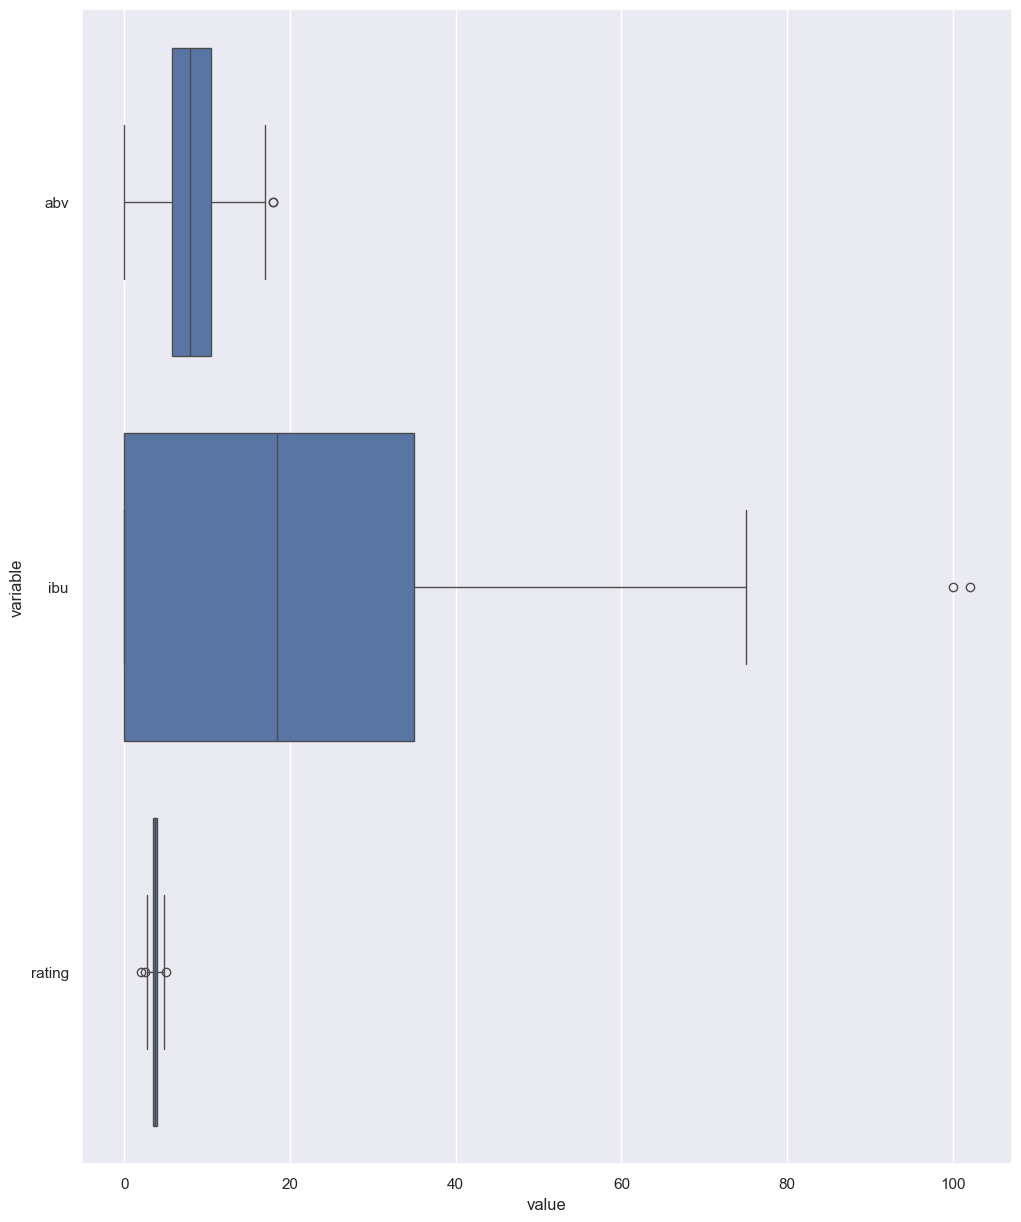

In [4]:
data_quality_assessor.draw_boxplots()

### Distribution of Categorical Feature

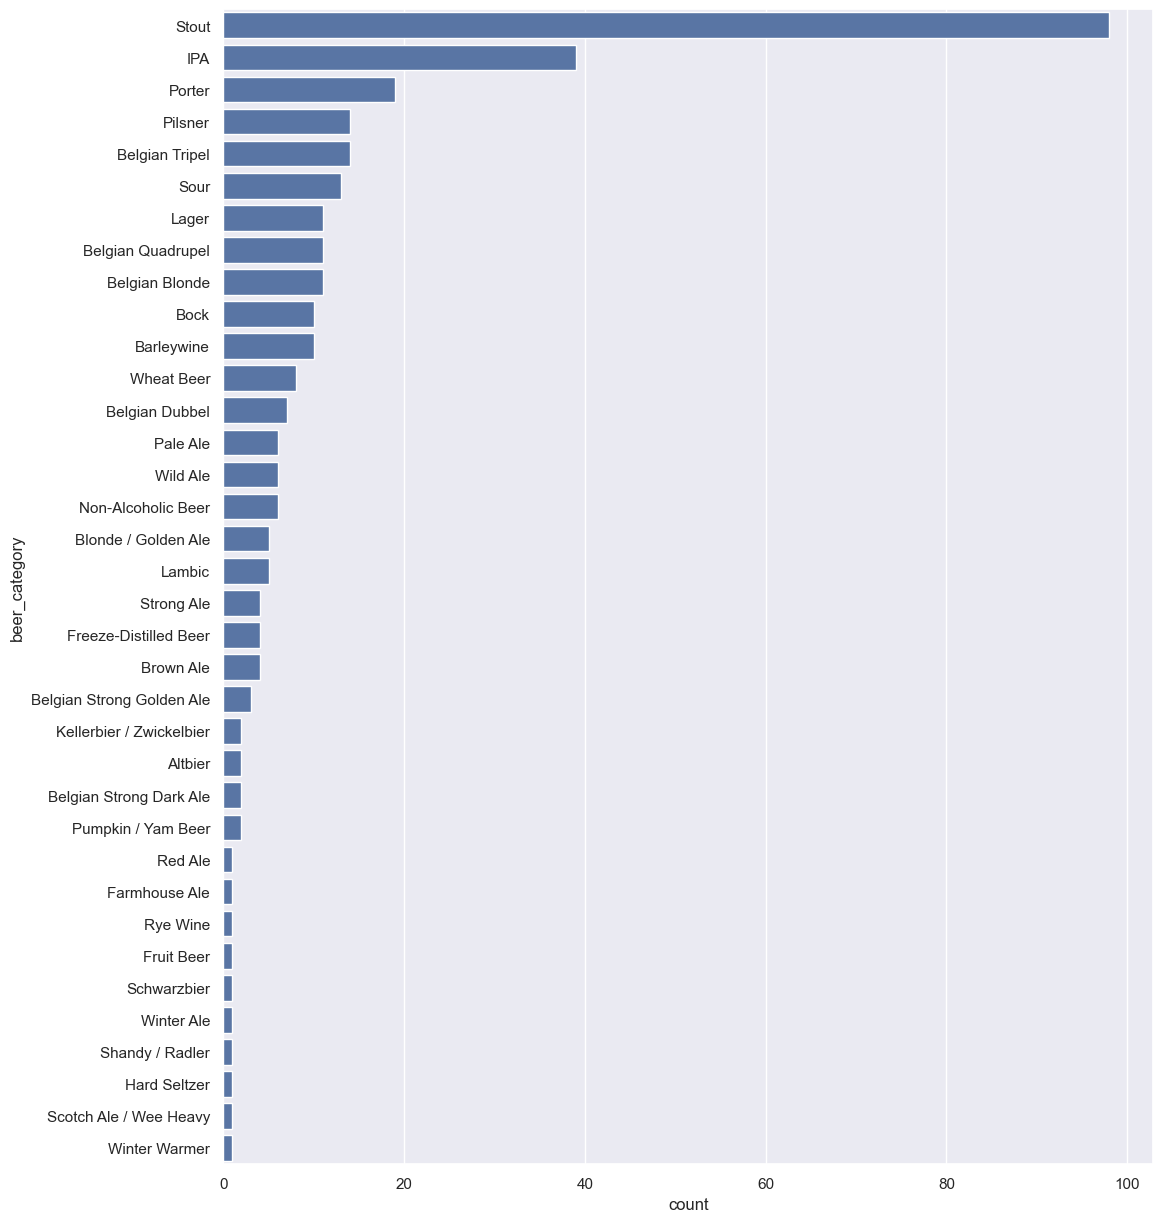

In [5]:
FEATURE_NAME = "beer_category"

data_quality_assessor.draw_categorical_feature(FEATURE_NAME)

### Distribution of Continuous Feature

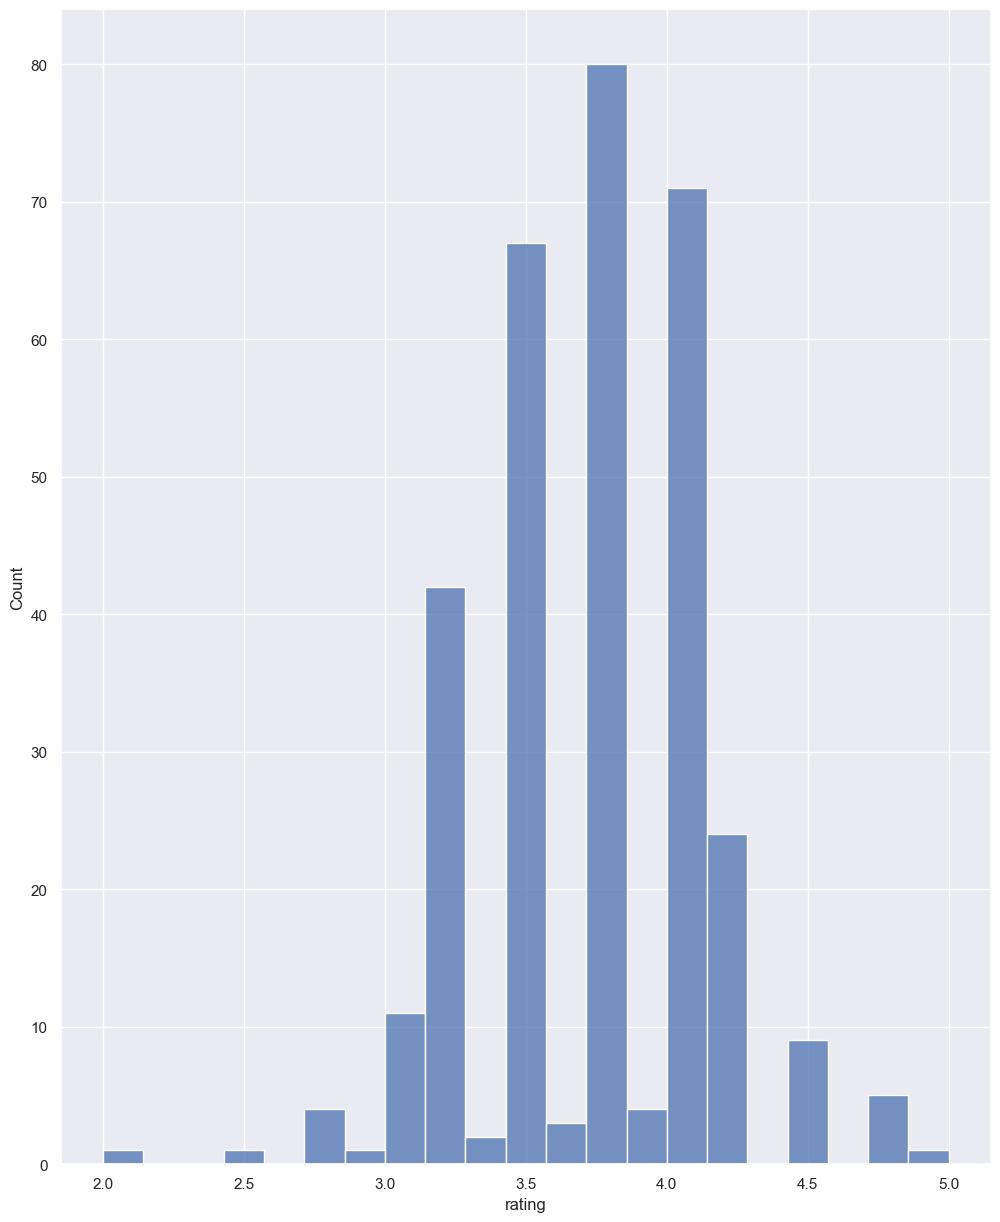

In [6]:
FEATURE_NAME = "rating"

data_quality_assessor.draw_continuous_feature(FEATURE_NAME)

### Rates of NULL Values

In [10]:
data_quality_assessor.get_null_rates()

,NULL Rate
beer_name,0.00
brewery_name,0.00
beer_category,0.00
beer_type,0.00
abv,0.00
ibu,0.00
description,0.76
rating,0.00
acetaldehyde,0.00
acidic,0.00


### Rate of Duplicate Rows

In [8]:
PRIMARY_KEY = ["beer_name", "brewery_name"]

data_quality_assessor.get_duplicate_rate(primary_key=PRIMARY_KEY)

0.0